## Objective
400 applicants have been surveyed as potential students for UCLA. The university weighs certain aspects of a student's education to determine their acceptance.

The objective is to explore what kind of data is provided, determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.

## Data Description
The dataset contains information about a student's:

GRE Score

TOEFL Score

University Ratings

Statement of Purpose Score

Letter of Recomendation Score

CGPA

Whether the Student Has Done Any Research

Chance of Admission (What We're Trying to Predict)

### Importing the necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [3]:
os.chdir(r'C:\Users\ash65\Documents\Praxis\Project\Management seat prediction')
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


We noticed there is a unwanted space at the end of the column name ''Chance of Admit ' in the dataset , so we will rename it and remove the extra space.

In [4]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Checking if there are any null values

In [5]:
total_null = df.isnull().sum().sort_values(ascending=False) #to check the presence of null values
total_null

Chance of Admit      0
Research             0
CGPA                 0
LOR                  0
SOP                  0
University Rating    0
TOEFL Score          0
GRE Score            0
Serial No.           0
dtype: int64

There are no null values in the dataset , we are good to go ahead !

### Some important information:

There are 9 columns: Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit
    
There are no null records. It's good.

There are 400 samples in total. That's enough.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


#### df.info ():

It was used to find the number of samples and the number of features.

There is no string or null data.

Serial No. may be deleted because it stores index values. In the future this column does not benefit.

## Correlation

#### To see the correlation of all the features compared to Chance to Admit:

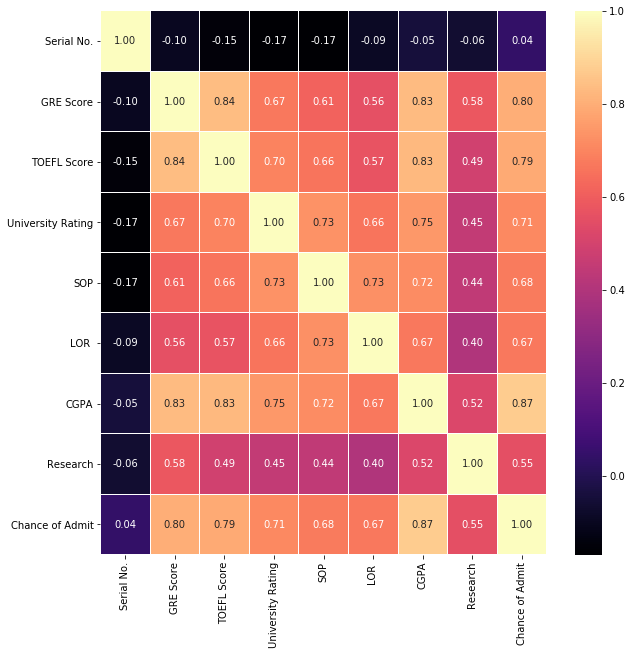

In [7]:
# Correlation between all columns
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

If 2 variables are highly correlated , we drop one of the feature. The both are doing the same task.

Whenver two features are correlated with more than 80 percent and we can drop one of those features

In [8]:
threshold = 0.8

In [9]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
correlation(df.iloc[:,:-1],threshold)

{'CGPA', 'TOEFL Score'}

#### The 2 most important features for admission to the Master: CGPA and TOEFL SCORE
#### The 3 least important features for admission to the Master: Research, LOR, and SOP

# EDA

### Univariate Analysis

### Research

Not Having Research: 181
Having Research: 219


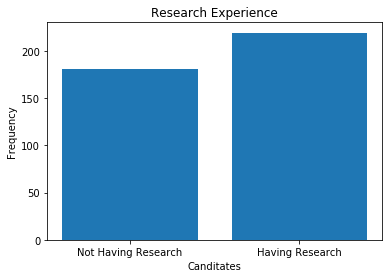

In [11]:
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

#### Observations
Having Research or not:

The majority of the candidates in the dataset have research experience.
Therefore, the Research will be a unimportant feature for the Chance of Admit. 
The correlation between Chance of Admit and Research was already lower than other correlation values.

### TOEFL Score

The worst TOEFL score is: 92
The average TOEFL score is: 107.41
The best TOEFL score is: 120


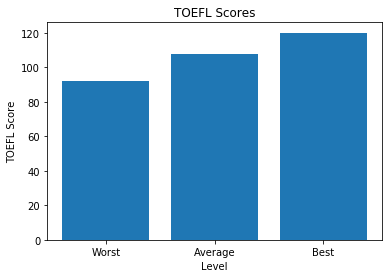

In [12]:
min_score = df["TOEFL Score"].min()
max_score = df["TOEFL Score"].max()
average_score = df["TOEFL Score"].mean()
print('The worst TOEFL score is:', min_score)
print('The average TOEFL score is:', average_score)
print('The best TOEFL score is:', max_score)
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

### Observations:
TOEFL Score:

The lowest TOEFL score is 92 and the highest Toefl score is 120. The average is 107.41.

### GRE Score

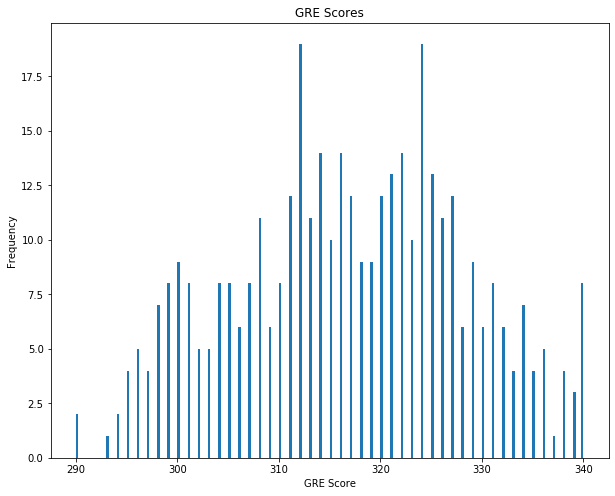

In [13]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (10,8))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

### Observations
GRE Score:

This histogram shows the frequency for GRE scores.

There is a density between 310 and 330. Being above this range would be a good feature for a candidate to stand out.

### Bivariate Analysis

### CGPA Score for University Ranking

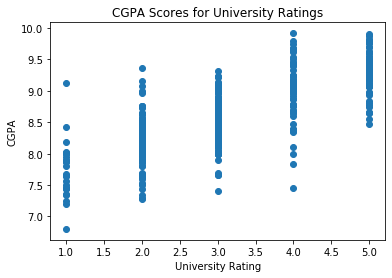

In [14]:
plt.scatter(df["University Rating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

### Observations:
CGPA Scores for University Ratings:

As the quality of the university increases, the CGPA score increases.

### Scatter of CGPA & GRE

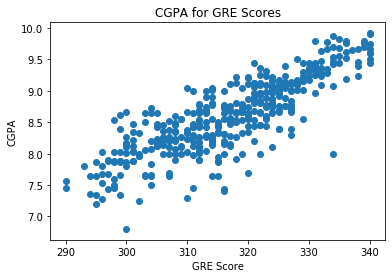

In [15]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

### Observation:
Candidates with high GRE scores usually have a high CGPA score.

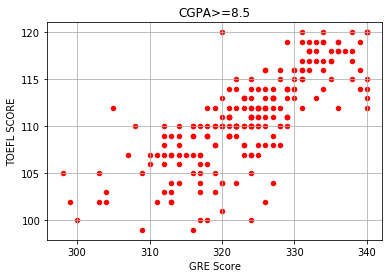

In [16]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

### Observation:
We can find a huge cluster of people (whose cgpa is above 8.5) to have performed better in both GRE as well as TOEFL

### University Rating vs Chance of Admit

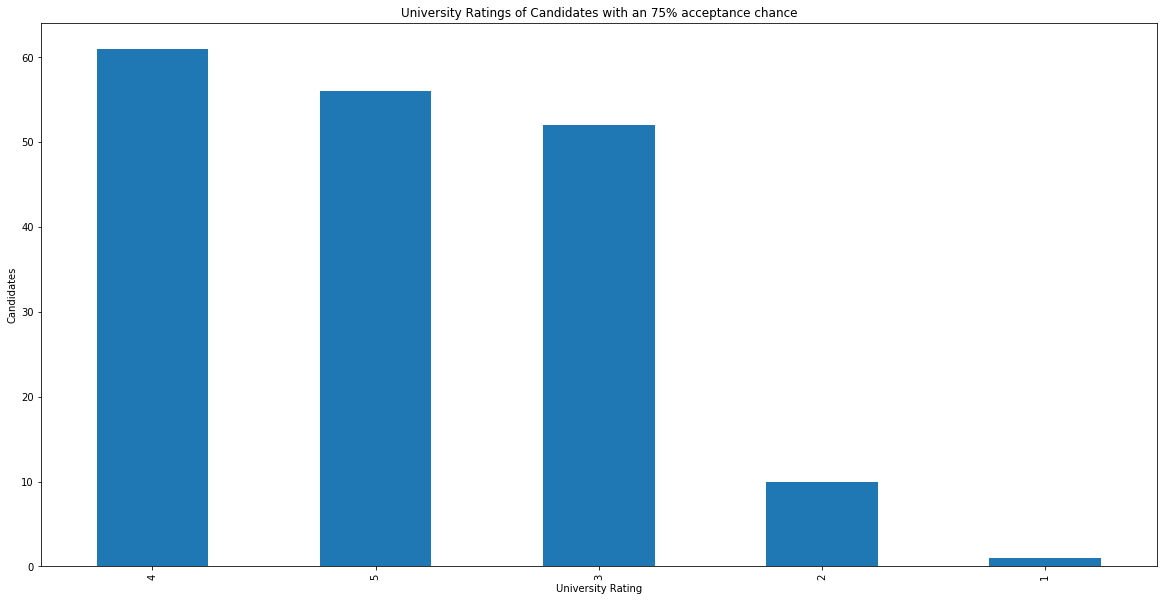

In [17]:
#Here we will be considering(subsetting) only those students whose change of admit is greater
#than 0.75
s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

### Observation:

Candidates who graduate from good universities are more likely to be accepted.

### SOP vs CGPA

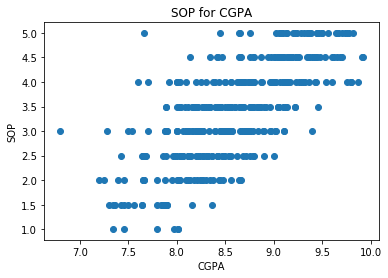

In [18]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

### Observation:

Candidates with high CGPA scores usually have a high SOP score.

### SOP vs GRE Score

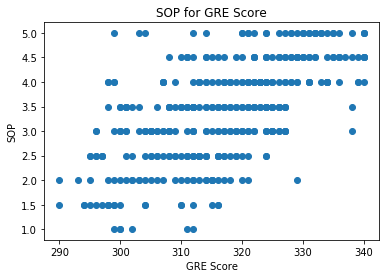

In [19]:
plt.scatter(df["GRE Score"],df["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

### Observation:

Candidates with high GRE scores usually have a high SOP score.

# Regression Analysis

In [20]:
df = pd.read_csv('Admission_Predict.csv')

# it may be needed in the future.
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})


Serial No. is deleted because it stores index values. In the future this column does not benefit for regression algorithms.

#### Let us now select the 'Chance of Admit' as our target variable and the rest of the predictures as features.

In [21]:
from sklearn.model_selection import  train_test_split

In [22]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

It splits the data into random train (80%) and test (20%) subsets.

## Models

Fitting the Model on features

# Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
# random forest with 500 trees
# fit the model
rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [25]:
# Make predictions
rt_y_predict = rt_reg.predict(x_test)

In [26]:
#Evaluating the Model   
print('R^2:',metrics.r2_score(y_test,rt_y_predict ))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, rt_y_predict))*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, rt_y_predict))
print('MSE:',metrics.mean_squared_error(y_test, rt_y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, rt_y_predict)))
## Accuracy
random_forest_accuracy= (rt_reg.score(x_test, y_test))*100
print('The accuracy of the model is',random_forest_accuracy)

R^2: 0.8117701003028385
Adjusted R^2: 0.7934699711656145
MAE: 0.04894174999999992
MSE: 0.004860728345000005
RMSE: 0.06971892386576262
The accuracy of the model is 81.17701003028385


## Pickle creation

In [27]:
import pickle
with open("Pickle_file_management.pkl","wb") as file:
    pickle.dump(rt_reg,file)

In [28]:
with open ("Pickle_file_management.pkl",'rb') as file:
    rtreg_Model = pickle.load(file)

In [30]:
Ypredict = rtreg_Model.predict(x_test)

In [31]:
Ypredict

array([0.65932, 0.72462, 0.94188, 0.817  , 0.57216, 0.91598, 0.57124,
       0.46376, 0.6697 , 0.90066, 0.72522, 0.94088, 0.53988, 0.90152,
       0.71232, 0.65858, 0.69088, 0.4761 , 0.71098, 0.9588 , 0.61418,
       0.67112, 0.6955 , 0.54284, 0.94358, 0.81206, 0.73166, 0.58438,
       0.70982, 0.79814, 0.79986, 0.94358, 0.64388, 0.46754, 0.7042 ,
       0.67338, 0.69666, 0.69676, 0.63056, 0.92352, 0.752  , 0.63894,
       0.76696, 0.94912, 0.87632, 0.83796, 0.96276, 0.65336, 0.93102,
       0.88436, 0.91096, 0.69804, 0.7631 , 0.94346, 0.5724 , 0.58206,
       0.68548, 0.84256, 0.5647 , 0.8742 , 0.6406 , 0.62614, 0.69208,
       0.45476, 0.66628, 0.63006, 0.6041 , 0.84746, 0.88024, 0.772  ,
       0.67706, 0.81592, 0.92158, 0.86326, 0.53612, 0.73922, 0.68144,
       0.54046, 0.84548, 0.7709 ])

In [33]:
random_forest_accuracy= (rtreg_Model.score(x_test, Ypredict))*100
print('The accuracy of the model is',random_forest_accuracy)

The accuracy of the model is 100.0
